# Assignment 1

## Assignment Guide

* Answer **ALL** questions.
* Total marks: 30.
* Data for Questions 1 & 2 are available from the course L@G website. Data for Question 3 can be loaded from the internet.
* Use Jupyter Notebook/Python to achieve the answers. 
* Type up your answers in a Word file (you may copy & paste some of the Python outcomes to the file).
* Assignment submission: **`upload two files`** – [1] the Word file [2] the Jupyter Notebook/Python file (either pdf (preferred) or ipynb). 10 marks will be deducted if only one file is submitted.
* A title page is required for the Word file with the safe assignment check. 5 marks off without safe assignment check.
* Late submission without approval is subject to penalty (10% off per day).
* **`Due: 11:59pm, (Thursday) 20-August-2020`**


In [48]:
# import essential libraries
import pandas as pd
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy
sns.set() 

## Question 1 (9 marks)

Use dataset stock_p2.csv to answer this question. The dataset has three columns: date, coke, and pepsi, where coke and pepsi are daily stock prices (at close) of Coca-Cola Bottling Co. Consolidated and PepsiCo, Inc., respectively, from 1990-12-31 to 2020-06-30.

1. How many rows and columns are in the dataset? Set "Date" as the row index. Print out the last 5 observations in year `2019`. 
2. Find the dates that Coke & Pepsi stocks reach their highest price levels, respectively. Find the dates that the two companies have the same level of stock price. 
3. Compute the “log-return” (as defined in Topic 4) of the two stocks. Make violinplots of the two returns (specify inner as quartile). Comment on the results.
4. Find mean, standard deviation, skewness, and kurtosis of Coke & Pepsi returns, respectively. Comment on the results.
5. Make a scatterplot of the two returns with a fitted line & compute the correlation coefficient of them. Comment on the results.
6. Consider three subperiods: [1] 1990.12.31 to 1999.12.31 [2] 2000.01.01 to 2009.12.31 [3] 2010.01.01 to 2020.06.30. Redo the previous question (part 5) for each of the three subperiods. Comment on the relationship of Coke & Pepsi stock returns over the three subperiods.

In [49]:
# load data, turn Date into datetime format, set Date as the index
sp2=pd.read_csv('stock_p2.csv', parse_dates=['Date'])
sp2.head()

Date   coke    pepsi
0 1990-12-31  19.00  13.0000
1 1991-02-01  18.25  12.8750
2 1991-03-01  17.50  12.5000
3 1991-04-01  16.75  12.4375
4 1991-07-01  16.75  12.1250

In [46]:
print("The total number of rows are: "+str(len(sp2)))
print("The total number of columns are: "+str(len(sp2.columns)))
index=0
data=sp2.itertuples()
lst=[]
for i in data:
    temp=[]
    temp.append(i[1])
    temp.append(i[2])
    temp.append(i[3])
    lst.append(temp)
index=0
for i in range(len(lst)):
    if lst[i][0].year==2019:
        index=i
print("The last five data of 2019 are: ")
for i in range(5):
    print(lst[index-i])


The total number of rows are: 7432
The total number of columns are: 3
The last five data of 2019 are: 
[Timestamp('2019-12-31 00:00:00'), 284.0499878, 136.66999819999998]
[Timestamp('2019-12-30 00:00:00'), 289.0, 136.8099976]
[Timestamp('2019-12-27 00:00:00'), 293.64999389999997, 137.53999330000002]
[Timestamp('2019-12-26 00:00:00'), 292.64001460000003, 136.6900024]
[Timestamp('2019-12-24 00:00:00'), 286.44000239999997, 136.8899994]


In [50]:
date_coke=""
date_pepsi=""
date_same_price=[]
max_coke = 0
max_pepsi=0
for i in range(len(lst)):

    if float(lst[i][1]) >= max_coke:
        date_coke=lst[i][0]
        max_coke=float(lst[i][1])
    if float(lst[i][2]) >= max_pepsi:
        date_pepsi=lst[i][0]
        max_pepsi=float(lst[i][2])
    if float(lst[i][1])==float(lst[i][2]):
        date_same_price.append(lst[i][0])
print("The dates when coke had highest stock price are: ")
print(date_coke)
print("The dates when pepsi had highest stock price are: ")
print(date_pepsi)
print("The dates when coke and pepsi had same stock price are: ")
print(date_same_price)

The dates when coke had highest stock price are: 
2019-05-13 00:00:00
The dates when pepsi had highest stock price are: 
2020-02-14 00:00:00
The dates when coke and pepsi had same stock price are: 
[Timestamp('1992-03-04 00:00:00'), Timestamp('1992-04-14 00:00:00'), Timestamp('1993-04-21 00:00:00'), Timestamp('1993-03-05 00:00:00'), Timestamp('1996-07-23 00:00:00'), Timestamp('2013-02-01 00:00:00')]


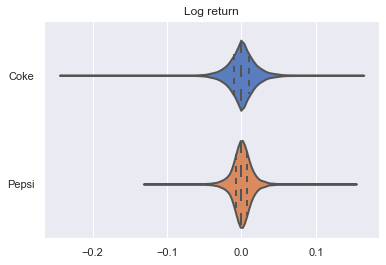

In [47]:
log_return_coke=[]
log_return_pepsi=[]
for i in range(1,len(lst)):
    log_return_coke.append(math.log(float(lst[i][1])/float(lst[i-1][1])))
    log_return_pepsi.append(math.log(float(lst[i][2])/float(lst[i-1][2])))

df = pd.DataFrame({'Coke': log_return_coke, 'Pepsi': log_return_pepsi})
sns.violinplot(data=df,inner='quartile',orient="h",palette="muted",linewidth=2)
plt.title("Log return")
plt.show()

In [51]:
coke=[]
pepsi=[]
for i in range(1,len(lst)):
    coke.append(float(lst[i][1]))
    pepsi.append(float(lst[i][2]))
print("The mean of coke is: "+ str(np.mean(coke)))
print("The mean of coke is: "+ str(np.mean(pepsi)))
print("The standard deviation of coke is: "+ str(np.std(coke)))
print("The standard deviation of pepsi is: "+ str(np.std(pepsi)))
print("The skewness of coke is: "+ str(scipy.stats.skew(coke)))
print("The skewness of pepsi is: "+ str(scipy.stats.skew(pepsi)))
print("The kurtosis of coke is: "+ str(scipy.stats.kurtosis(coke)))
print("The kurtosis of pepsi is: "+ str(scipy.stats.kurtosis(pepsi)))

The mean of coke is: 75.68462714363075
The mean of coke is: 59.453014174722114
The standard deviation of coke is: 64.756450186394
The standard deviation of pepsi is: 31.904003797552022
The skewness of coke is: 2.0272807671918565
The skewness of pepsi is: 0.6247369906125584
The kurtosis of coke is: 3.509868418135002
The kurtosis of pepsi is: -0.4049236448977602


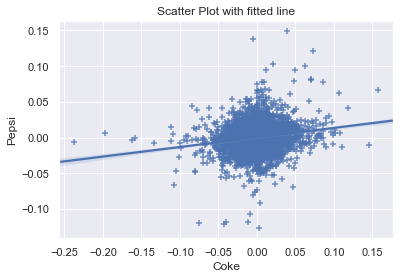

The correlation coefficient of log returns of pepsi and coke stock price is 0.18453363679142534


In [52]:
plt.title("Scatter Plot with fitted line")
sns.regplot(x=df['Coke'],y=df['Pepsi'],data=df,marker="+")
plt.show()  
c=np.corrcoef(x=df['Coke'],y=df['Pepsi'])
print("The correlation coefficient of log returns of pepsi and coke stock price is "+ str(c[0,1]))

The correlation coefficient of period 1 of pepsi and coke stock price is 0.082357787285713


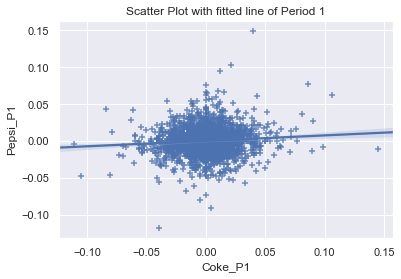

The correlation coefficient of period 2 of pepsi and coke stock price is 0.1834336750347974


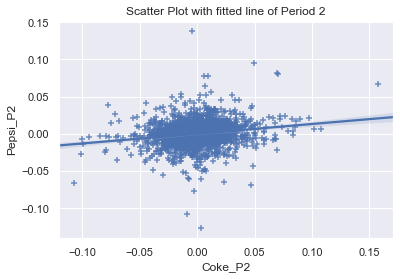

The correlation coefficient of period 3 of pepsi and coke stock price is 0.3427612096261364


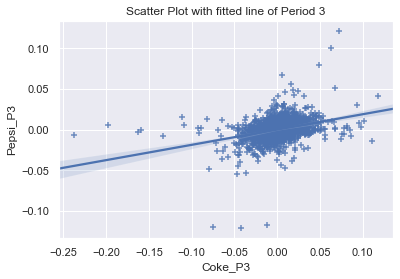

In [54]:
period_1_coke=[]
period_1_pepsi=[]
period_2_coke=[]
period_2_pepsi=[]
period_3_coke=[]
period_3_pepsi=[]
for i in range(1,len(lst)):
    if lst[i][0].year>=1990 and lst[i][0].year<=1999:
        period_1_coke.append(math.log(float(lst[i][1])/float(lst[i-1][1])))
        period_1_pepsi.append(math.log(float(lst[i][2])/float(lst[i-1][2])))
    elif lst[i][0].year>=2000 and lst[i][0].year<=2009:
        period_2_coke.append(math.log(float(lst[i][1])/float(lst[i-1][1])))
        period_2_pepsi.append(math.log(float(lst[i][2])/float(lst[i-1][2])))
    elif lst[i][0].year>=2010 and lst[i][0].year<=2020:
        period_3_coke.append(math.log(float(lst[i][1])/float(lst[i-1][1])))
        period_3_pepsi.append(math.log(float(lst[i][2])/float(lst[i-1][2])))

df_1 = pd.DataFrame({'Coke_P1': period_1_coke,'Pepsi_P1': period_1_pepsi})
df_2 =pd.DataFrame({'Coke_P2': period_2_coke,'Pepsi_P2':period_2_pepsi})
df_3 = pd.DataFrame({'Coke_P3':period_3_coke,'Pepsi_P3':period_3_pepsi})

plt.title("Scatter Plot with fitted line of Period 1")
sns.regplot(x=df_1['Coke_P1'],y=df_1['Pepsi_P1'],data=df_1,marker="+")
c=np.corrcoef(x=df_1['Coke_P1'],y=df_1['Pepsi_P1'])
print("The correlation coefficient of period 1 of pepsi and coke stock price is "+ str(c[0,1]))
plt.show()

plt.title("Scatter Plot with fitted line of Period 2")
sns.regplot(x=df_2['Coke_P2'],y=df_2['Pepsi_P2'],data=df_2,marker="+")
c=np.corrcoef(x=df_2['Coke_P2'],y=df_2['Pepsi_P2'])
print("The correlation coefficient of period 2 of pepsi and coke stock price is "+ str(c[0,1]))
plt.show()

plt.title("Scatter Plot with fitted line of Period 3")
sns.regplot(x=df_3['Coke_P3'],y=df_3['Pepsi_P3'],data=df_3,marker="+")
c=np.corrcoef(x=df_3['Coke_P3'],y=df_3['Pepsi_P3'])
print("The correlation coefficient of period 3 of pepsi and coke stock price is "+ str(c[0,1]))
plt.show()  

## Question 2 (15 marks)

Use data in w2000.csv to answer this question. The dataset contains information of top 2000 wealthiest persons in the world (of 2018), including the following columns: position, name, age, country, gender, wealthSource, industry, and worth (in millions of USD).

1. How many countries have at least one wealthiest person in the dataset? How many have at least one wealthiest man? How many have at least one wealthiest woman?
2. Make a list of the top 10 wealthiest women and compute the total wealth of them.
3. What are the top 20 countries having the majority of wealthiest persons? Make a bar chart showing the number of wealthiest persons for each of these countries.
4. Make two pie plots of total worth by each industry, one for Japan and another for South Korea. Compare the two plots.
5. Find the oldest wealthiest person of each industry in Australia. Find all wealthiest men in the world of the "finance & investments" industry who are over 90 years old. 
6. Find two lists of wealthiest persons -- first list contains those associated with Google (in terms of wealth source) and second list contains those with Facebook. Compare the average age across the two lists.
7. Which industry (apart from Philanthropy/NGO) has the highest percentage of wealthiest women? Are there any countries in the world with all wealthiest persons being female? 
8. Find the 10 most pupolar first names of wealthiest persons in the US. How many wealthiest men in the world are with first name 'Jack'?
9. Create a subset of the so-called BRICS countries (Brazil, Russia, India, China, South Africa). In total, how many wealthiest persons are from BRICS? What is the average age of them by each country? 
10.	Use the BRICS subset to make a boxplot of age by each industry, separated by gender with "hue" (in one graph). Comment on the plot.


In [56]:
w=pd.read_csv('w2000.csv')
w.head(5)

position             name  age        country gender        wealthSource  \
0         1       Jeff Bezos   54  United States      M              Amazon   
1         2       Bill Gates   62  United States      M           Microsoft   
2         3   Warren Buffett   87  United States      M  Berkshire Hathaway   
3         4  Bernard Arnault   69         France      M                LVMH   
4         5  Mark Zuckerberg   34  United States      M            Facebook   

                  industry   worth  
0               Technology  112000  
1               Technology   90000  
2  Finance and Investments   84000  
3         Fashion & Retail   72000  
4               Technology   71000

In [58]:
data=w.itertuples()
lst=[]
for i in data:
    temp=[]
    temp.append(i[1])
    temp.append(i[2])
    temp.append(i[3])
    temp.append(i[4])
    temp.append(i[5])
    temp.append(i[6])
    temp.append(i[7])
    temp.append(i[8])
    lst.append(temp)
country=[]
man=[]
woman=[]
top_10_women=[]
top_20=[]
for i in range(len(lst)):
    if lst[i][3] not in country:
        country.append(lst[i][3])
        top_20.append((lst[i][3],1))
    if lst[i][4]=="M" and lst[i][3] not in man:
        man.append(lst[i][3])
    if lst[i][4]=="F" and lst[i][3] not in woman:
        woman.append(lst[i][3])
    if lst[i][4]=="F":
        top_10_women.append((lst[i][1],float(lst[i][7])))
    if lst[i][3] in country:  
        for j in range(len(top_20)):
            if top_20[j][0]==lst[i][3]:
                top_20[j]=(top_20[j][0],top_20[j][1]+1)
                break

print("The total number of countries having at least one wealthy person is "+ str(len(country)))
print("The total number of countries having at least one wealthy man is "+ str(len(man)))
print("The total number of countries having at least one wealthy woman is "+ str(len(woman)))

The total number of countries having at least one wealthy person is 72
The total number of countries having at least one wealthy man is 70
The total number of countries having at least one wealthy woman is 33


In [59]:
# take second element for sort
def takeSecond(elem):
    return elem[1]
top_10_women.sort(reverse=True,key=takeSecond)
sum=0
print("The list of top 10 wealthiest women are: ")
for i in range(10):
    print(top_10_women[i][0])
    sum=sum+float(top_10_women[i][1])
print("The total sum of wealthy women is: "+ str(sum))

The list of top 10 wealthiest women are: 
Alice Walton
Francoise Bettencourt Meyers
Susanne Klatten
Jacqueline Mars
Yang Huiyan
Laurene Powell Jobs
Gina Rinehart
Iris Fontbona
Abigail Johnson
Charlene de Carvalho-Heineken
The total sum of wealthy women is: 242900.0


In [60]:
top_20.sort(reverse=True,key=takeSecond)
top_20=top_20[:20]
top_20_country=[]
top_20_country_count=[]
for i in range(len(top_20)):
    top_20_country.append(top_20[i][0])
    top_20_country_count.append(top_20[i][1])
df = pd.DataFrame({'Country': top_20_country, 'Count': top_20_country_count})
sns.barplot(data=df,y=df['Country'],x=df['Count'],orient="h")
plt.title("Top 20 countries having the majority of wealthiest persons")
plt.show()

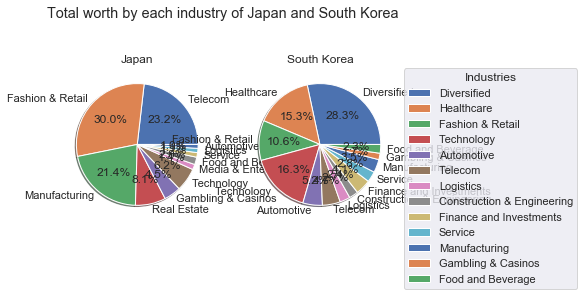

In [61]:
japan=[]
japan_industry=[]
southkorea=[]
southkorea_industry=[]
for i in range(len(lst)):
    if lst[i][3]=="Japan":
        if lst[i][6] not in japan_industry:
            japan_industry.append(lst[i][6])
            japan.append(float(lst[i][7]))
        if lst[i][6] in japan_industry:
            for j in range(len(japan_industry)):
                if lst[i][6]==japan_industry[j]:
                    japan[j]=japan[j]+float(lst[i][7])
    if lst[i][3]=="South Korea":
        if lst[i][6] not in southkorea_industry:
            southkorea_industry.append(lst[i][6])
            southkorea.append(float(lst[i][7]))
        if lst[i][6] in southkorea_industry:
            for j in range(len(southkorea_industry)):
                if lst[i][6]==southkorea_industry[j]:
                    southkorea[j]=southkorea[j]+float(lst[i][7])
df = pd.DataFrame({'Japan_In': japan_industry, 'Japan': japan})
df_x=({'Southkorea_In': southkorea_industry,'Southkorea': southkorea})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.suptitle('Total worth by each industry of Japan and South Korea')
g1 = ax1.pie(df['Japan'], labels=df['Japan_In'], autopct='%1.1f%%', shadow=True)
ax1.set_title("Japan")
g2 = ax2.pie(df_x['Southkorea'], labels=df_x['Southkorea_In'], autopct='%1.1f%%', shadow=True)
ax2.set_title("South Korea")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Industries')
plt.show()

In [62]:
australia=[]
australia_industry=[]
wealthiest_over90=[]
for i in range(len(lst)):
    if lst[i][6]=="Finance and Investments" and int(lst[i][2])>90:
        wealthiest_over90.append(lst[i][1])
    if lst[i][3]=="Australia":
        if lst[i][6] not in australia_industry:
            australia_industry.append(lst[i][6])
            australia.append((lst[i][1],int(lst[i][2])))
        if lst[i][6] in australia_industry:
            for j in range(len(australia_industry)):
                if lst[i][6]==australia_industry[j] and australia[j][1]<=int(lst[i][2]):
                    australia[j]=(lst[i][1],int(lst[i][2]))
print("The oldest wealthiest person in Australia in industries are: ")
for i in range(len(australia_industry)):
    print(str(i+1)+") "+australia_industry[i]+" is "+australia[i][0]+" with age "+str(australia[i][1]))
print("The list of wealthy person in industry finance and investment who are over 90 are: ")
print(wealthiest_over90)

The oldest wealthiest person in Australia in industries are: 
1) Metals & Mining is Angela Bennett with age 74
2) Real Estate is Stanley Perron with age 95
3) Automotive is Vivek Chaand Sehgal with age 61
4) Manufacturing is Manny Stul with age 69
5) Gambling & Casinos is Len Ainsworth with age 94
6) Technology is Richard White with age 63
7) Logistics is Lindsay Fox with age 81
8) Diversified is Kerry Stokes with age 77
9) Finance and Investments is David Hains with age 87
10) Food and Beverage is Jack Cowin with age 75
11) Fashion & Retail is Gerry Harvey with age 78
12) Telecom is David Teoh with age 62
13) Construction & Engineering is Bob Ell with age 73
The list of wealthy person in industry finance and investment who are over 90 are: 
['Albert Frere', 'Aloysio de Andrade Faria', 'David Gottesman', 'Peter Peterson', 'Charles Munger', 'Stephen Jarislowsky', 'George Joseph']


In [63]:
age_google=[]
age_facebook=[]
sum_age_google=0
sum_age_facebook=0
for i in range(len(lst)):
    if lst[i][5]=='Google':
        age_google.append(lst[i][1])
        sum_age_google=sum_age_google+int(lst[i][2])
    if lst[i][5]=='Facebook':
        age_facebook.append(lst[i][1])
        sum_age_facebook=sum_age_facebook+int(lst[i][2])
print("The average age of people with wealthsource google is: "+str(sum_age_google/len(age_google)))
print("The average age of people with wealthsource facebook is: "+str(sum_age_facebook/len(age_facebook)))


The average age of people with wealthsource google is: 56.2
The average age of people with wealthsource facebook is: 42.166666666666664


In [64]:
industry=[]
wealthiest_women=[]
only_female=[]

for i in range(len(lst)):
    if lst[i][4]=="F" and lst[i][6] != "Philanthropy/NGO":
        if lst[i][6] not in industry:
            industry.append(lst[i][6])
            wealthiest_women.append(1)
        if lst[i][6] in industry:
            for j in range(len(industry)):
                if lst[i][6]==industry[j]:
                    wealthiest_women[j]=wealthiest_women[j]+1

index=wealthiest_women.index(max(wealthiest_women))
print("The industry (apart from Philanthropy/NGO) which has the highest percentage of wealthiest women is "+industry[index])

for i in range(len(lst)):
    if lst[i][3] not in only_female:
        only_female.append(lst[i][3])
        for j in range(len(lst)):
            if lst[j][3]==lst[i][3]:
                if lst[j][4]=="F":
                    female=1
                else:
                    female=0
                    break
        if female==1:
            print(" The country having only female wealthy person is: "+lst[i][3])

The industry (apart from Philanthropy/NGO) which has the highest percentage of wealthiest women is Food and Beverage
 The country having only female wealthy person is: Portugal
 The country having only female wealthy person is: Angola


In [65]:
top_10_US=[] # assuming top 10 wealthiest in US as famous person
jack_count=0
for i in range(len(lst)):
    if lst[i][3]=="United States" and len(top_10_US)<10:
        top_10_US.append(lst[i][1])
    elif len(top_10_US)>10:
        break
print("the list of top 10 famous wealthy person in US are: ")
print(top_10_US)

for i in range(len(lst)):
    if lst[i][1][0:5].strip()=="Jack":
        jack_count=jack_count+1
print("The total people with first name jack are: "+str(jack_count))

the list of top 10 famous wealthy person in US are: 
['Jeff Bezos', 'Bill Gates', 'Warren Buffett', 'Mark Zuckerberg', 'Charles Koch', 'David Koch', 'Larry Ellison', 'Michael Bloomberg', 'Larry Page', 'Sergey Brin']
The total people with first name jack are: 3


In [66]:
BRIC=[]
sum_B=0
sum_R=0
sum_I=0
sum_C=0
sum_S=0
count_B=0
count_R=0
count_I=0
count_C=0
count_S=0
industry_BRICS=[]
age=[]
for i in range(len(lst)):
    if lst[i][3]=="Brazil" or lst[i][3]=="Russia" or lst[i][3]=="India" or lst[i][3]=="China" or lst[i][3]=="South Africa":
        BRIC.append(lst[i])
        if lst[i][3]=="Brazil":
            sum_B=sum_B+int(lst[i][2])
            count_B=count_B+1
        if lst[i][3]=="Russia":
            sum_R=sum_R+int(lst[i][2])
            count_R=count_R+1
        if lst[i][3]=="India":
            sum_I=sum_I+int(lst[i][2])
            count_I=count_I+1
        if lst[i][3]=="China":
            sum_C=sum_C+int(lst[i][2])
            count_C=count_C+1
        if lst[i][3]=="South Africa":
            sum_S=sum_S+int(lst[i][2])
            count_S=count_S+1
print("The total number of people from BRIC are: "+str(len(BRIC)))
print("The average age of people in Brazil is: "+str(sum_B/count_B))
print("The average age of people in Russia is: "+str(sum_R/count_R))
print("The average age of people in India is: "+str(sum_I/count_I))
print("The average age of people in China is: "+str(sum_C/count_C))
print("The average age of people in South Africa is: "+str(sum_S/count_S))

The total number of people from BRIC are: 576
The average age of people in Brazil is: 68.43589743589743
The average age of people in Russia is: 55.03370786516854
The average age of people in India is: 66.20754716981132
The average age of people in China is: 55.70623145400594
The average age of people in South Africa is: 63.2


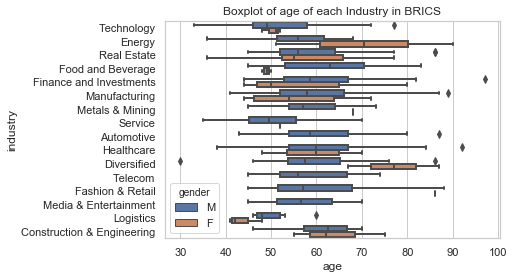

In [68]:
sns.set(style="whitegrid")
df = pd.read_csv('w2000.csv', index_col=0)
df=df.loc[(df['country']=="Brazil") | (df['country']=="Russia")| (df['country']=="India")| (df['country']=="China") | (df['country']=="South Africa")]
ax = sns.boxplot(x="age", y="industry", hue="gender",data=df,orient="h",linewidth=2.0)
plt.title("Boxplot of age of each Industry in BRICS")
plt.show()

## Question 3 (6 marks)

Load the data from the following link https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv and use the data to answer this question. Note that data from this link have been applied in Part 1, Topic 3. `Use data up to the end of July (2020-07-31).`

1. Find countries with deaths exceeding 10000. Get the first date for each of countries with more than 500000 confirmed cases.
2. Compute the overall daily death rate (i.e. "Deaths" divided "Confirmed" across all countries in each day) and plot it in a line chart. Identify the period that the overall daily death rate is higher than 5%.  
3. Make two rolling (moving-average) line plots (over 7 days) of new confirmed cases of Australia and Japan, respectively. Note: “new cases” is defined as the difference of confirmed cases over two consecutive days. Comment on the results.
4. Find countries in the world with at least one day having more than 10000 new cases. 


In [69]:
# get the Covid-19 data from the web (use data up to 2020-07-31)
# import data
covid = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
covid = covid[covid.Date<='2020-07-31']
covid.tail(3)

Date   Country  Confirmed  Recovered  Deaths
36093 2020-07-31     Yemen       1728        862     493
36094 2020-07-31    Zambia       5963       3803     151
36095 2020-07-31  Zimbabwe       3169       1004      67

In [71]:
countries=covid.loc[covid['Deaths']>10000]
country=[]
for i in countries['Country']:
    if i not in country:
        country.append(i)
print("Countries with deaths exceeding 10000 are:")
for i in country:
    print(i)
print("The first date for each of countries with more than 500000 confirmed cases: ")
country=[]
first_date=covid.loc[covid['Confirmed']>500000]
for label in first_date.itertuples():
    if label[2] not in country:
        country.append(label[2])
        print(label[2],label[1])

Countries with deaths exceeding 10000 are:
Italy
Spain
US
France
United Kingdom
Brazil
Mexico
India
Iran
Peru
Russia
Colombia
The first date for each of countries with more than 500000 confirmed cases: 
US 2020-04-11 00:00:00
Brazil 2020-05-31 00:00:00
Russia 2020-06-11 00:00:00
India 2020-06-26 00:00:00


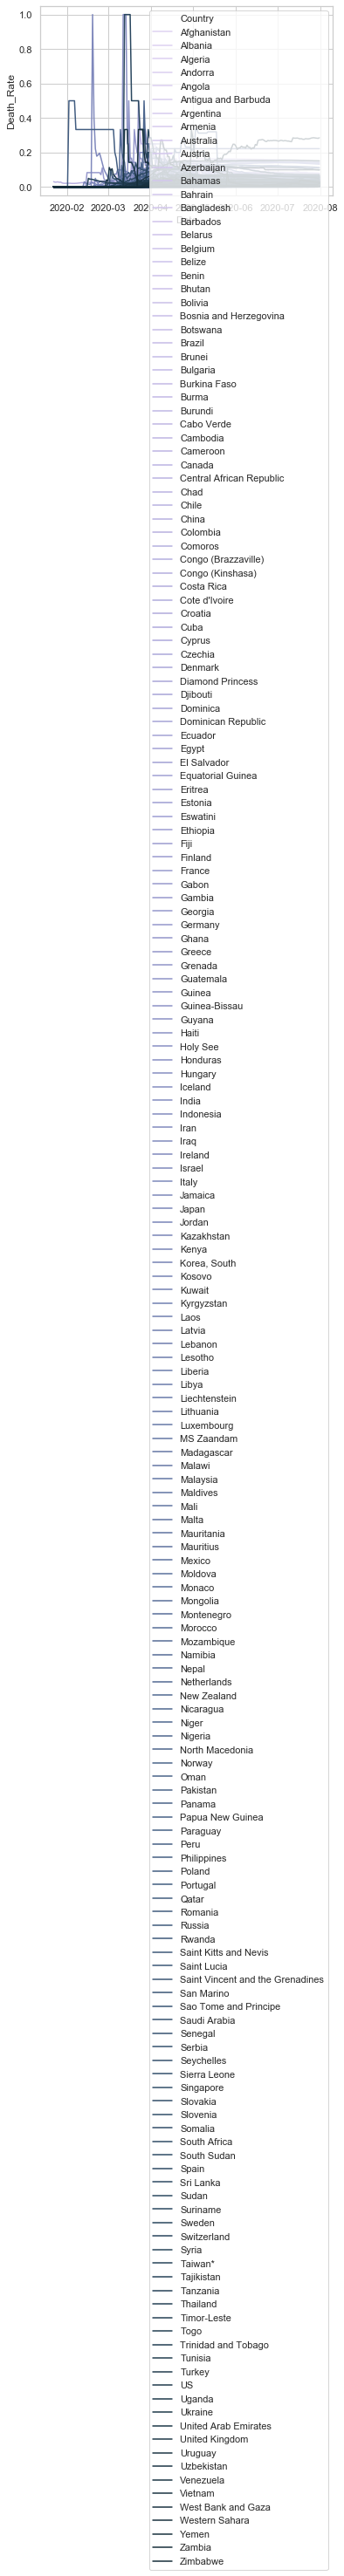

In [72]:
deathrate=[]
for row in covid.itertuples():
    if row[3] != 0:
        deathrate.append(row[5]/row[3])
    else:
        deathrate.append(0)

df = pd.DataFrame({'Country': covid["Country"], 'Death_Rate': deathrate, 'Date':covid["Date"]})
ax = sns.lineplot(x="Date", y="Death_Rate",hue="Country",data=df, palette="ch:2.5,.25")
plt.show()

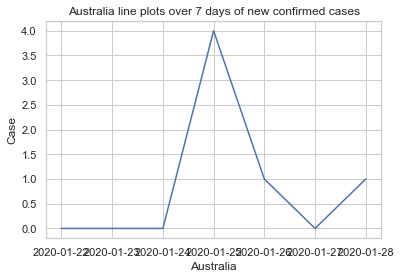

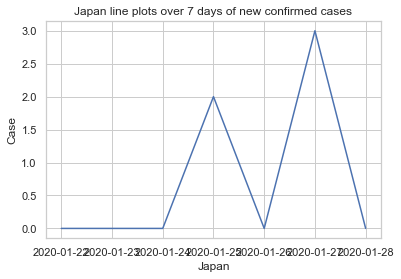

In [73]:
australia_case=[]
japan_case=[]
australia_date=[]
japan_date=[]
australia=covid.loc[covid['Country']=="Australia"]
japan=covid.loc[covid['Country']=="Japan"]

for i,row in australia.iterrows():
    lst=row.values
    australia_date.append(lst[0])
    australia_case.append(lst[2])
case_australia=[]
for i in range(len(australia_case)-1):
    case_australia.append(australia_case[i+1]-australia_case[i])
australia_date=australia_date[:7]
case_australia=case_australia[:7]
for i,row in japan.iterrows():
    lst=row.values
    japan_date.append(lst[0])
    japan_case.append(lst[2])
case_japan=[]
for i in range(len(japan_case)-1):
    case_japan.append(japan_case[i+1]-japan_case[i])
japan_date=japan_date[:7]
case_japan=case_japan[:7]

df_aus=pd.DataFrame({"Australia":australia_date,"Case":case_australia})
df_japan=pd.DataFrame({"Japan":japan_date,"Case":case_japan})
ax = sns.lineplot(x="Australia", y="Case",data=df_aus, palette="ch:2.5,.25")
plt.title("Australia line plots over 7 days of new confirmed cases")
plt.show()
ax = sns.lineplot(x="Japan", y="Case",data=df_japan, palette="ch:2.5,.25")
plt.title("Japan line plots over 7 days of new confirmed cases")
plt.show()


In [ ]:
row_iterator = covid.iterrows()
country=[]
for i, row in row_iterator:
    if i == 0:
        continue
    elif (covid.loc[i-1,'Confirmed'] - covid.loc [i,'Confirmed'])> 10000:
        if row[1] not in country:
            country.append(row[1])
print("The list of countries having at least one day having more than 10000 new cases are: ")
for i in country:
    print(i)